In [ ]:
import os, sys
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
pip install transformers

In [ ]:
!pip install ktrain

In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
import ktrain
from ktrain import text

In [ ]:
data_train = pd.read_csv('/content/drive/MyDrive/metin_madenciligi_proje/preprocessed_european_comments_train_10k.csv')

In [ ]:
data_train.head()

,Unnamed: 0,body,Subjectivity,Polarity,Analysis
0,0,"woman claims said insults, bystanders didnt. t...",0.843750,-0.322917,Negative
1,1,turkey doesn't know balkans.,0.000000,0.000000,Neutral
2,2,lot talk turkey,0.000000,0.000000,Neutral
3,3,don't like ruling party turkey. it's turkish p...,0.000000,0.000000,Neutral
4,4,create confusion absolute numbers. ~0.01 popul...,0.423384,-0.020833,Negative


In [ ]:
data_test = pd.read_csv('/content/drive/MyDrive/metin_madenciligi_proje/preprocessed_european_comments_test_2k.csv')

In [ ]:
data_test.head()

,Unnamed: 0,body,Subjectivity,Polarity,Analysis
0,56819,like daniel hannan. believe extremely wrong he...,0.336198,-0.077344,Negative
1,56820,eu charity - escaping war - shelter new life w...,0.405303,0.392424,Positive
2,56821,i've understood argument turkey europe (which ...,0.387500,-0.018750,Negative
3,56822,wrong. reason turkey didn't join 80m muslim co...,0.497778,0.040000,Positive
4,56823,"turkish people free europe, turkish people lot...",0.766667,0.400000,Positive


In [ ]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline
import os
os.environ["CUDA_DEVICE_ORDER"] = "PCI_BUS_ID";
os.environ["CUDA_VISIBLE_DEVICES"] = "0";

In [ ]:
X_train = data_train.body.values.astype(str).tolist()
y_train = data_train.Analysis.values.astype(str).tolist()

X_test = data_test.body.values.astype(str).tolist()
y_test = data_test.Analysis.values.astype(str).tolist()

In [ ]:
len(X_train), len(X_test)

(10014, 2109)

In [ ]:
# Building model with transformer
model_name = 'roberta-base'

trans = text.Transformer(model_name, maxlen=128)

In [ ]:
train_data = trans.preprocess_train(X_train, y_train)
test_data = trans.preprocess_test(X_test, y_test)

preprocessing train...
language: en
train sequence lengths:
	mean : 37
	95percentile : 120
	99percentile : 291


Is Multi-Label? False
preprocessing test...
language: en
test sequence lengths:
	mean : 41
	95percentile : 138
	99percentile : 260


In [ ]:
# getting roberta-base model.
model = trans.get_classifier() # AUC(name='auc') from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix, matthews_corrcoef, roc_curve, auc, roc_auc_score


In [ ]:
learner = ktrain.get_learner(model, train_data = train_data, val_data = test_data, batch_size = 8)

In [ ]:

#history = learner.fit_onecycle(1e-5, 3)
history = learner.autofit(1e-5, 5)



begin training using triangular learning rate policy with max lr of 1e-05...
Epoch 1/5
1252/1252 [==============================] - 325s 258ms/step - loss: 0.3539 - accuracy: 0.8672 - val_loss: 0.3883 - val_accuracy: 0.8478
Epoch 2/5
1252/1252 [==============================] - 325s 258ms/step - loss: 0.2873 - accuracy: 0.8951 - val_loss: 0.3871 - val_accuracy: 0.8644
Epoch 3/5
1252/1252 [==============================] - 325s 258ms/step - loss: 0.2339 - accuracy: 0.9155 - val_loss: 0.4207 - val_accuracy: 0.8563
Epoch 4/5
1252/1252 [==============================] - 325s 258ms/step - loss: 0.1873 - accuracy: 0.9362 - val_loss: 0.4566 - val_accuracy: 0.8578
Epoch 5/5
1252/1252 [==============================] - 325s 258ms/step - loss: 0.1571 - accuracy: 0.9471 - val_loss: 0.4497 - val_accuracy: 0.8559


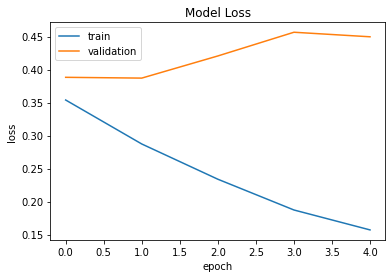

In [ ]:
learner.plot('loss')

In [ ]:
learner.validate()

              precision    recall  f1-score   support

           0       0.79      0.80      0.79       616
           1       0.90      0.88      0.89       434
           2       0.88      0.88      0.88      1059

    accuracy                           0.86      2109
   macro avg       0.86      0.85      0.85      2109
weighted avg       0.86      0.86      0.86      2109



array([[492,  21, 103],
       [ 25, 382,  27],
       [107,  21, 931]])

In [ ]:
y_pred = predictor.predict(X_test)